In [4]:
import json
import os
import os.path as osp
import torch
from torchvision import transforms
from torchvision import datasets
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [33]:
def visualize(k, v):
    os.makedirs(
            'visualizations',
            exist_ok=True)
    path = osp.join('/storage/slurm/seidensc/datasets/BDD100/bdd100k/images/track/val', k)
    print("Original")
    img = matplotlib.image.imread(path)
    figure, ax = plt.subplots(1)
    figure.set_size_inches(img.shape[1] / 100, img.shape[0] / 100)
    ax.imshow(img)
    plt.axis('off')
    plt.show()
    plt.close()
    
    print()
    print("Visualized")
    img = matplotlib.image.imread(path)
    figure, ax = plt.subplots(1)
    figure.set_size_inches(img.shape[1] / 100, img.shape[0] / 100)
    j = 0
    for bb, conf in zip(v['bboxes'], v['confs']):
        for i in range(len(bb)):
            box = bb[i]
            c = conf[i]
            
            # add rectangle
            rect = matplotlib.patches.Rectangle(
                (box[0], box[1]),
                box[2] - box[0],
                box[3] - box[1],
                edgecolor=colors[j],
                facecolor="none",
                linewidth=2)
            ax.add_patch(rect)

            # add text with id, ioa and visibility
            text = ', '.join(
                [str(box[-1])[:3], str(c)[:3]])
            plt.text(
                box[0] - 15,
                box[1] + (box[3] - box[1]) / 2,
                text,
                va='center',
                rotation='vertical',
                c='white',
                fontsize=5)
        j += 1
    
    
    for j, (cl, col) in enumerate(zip(classes, colors)):
        plt.text(
                j*30,
                30,
                cl,
                va='center',
                rotation='vertical',
                c=col,
                fontsize=8)
    
    ax.imshow(img)
    plt.axis('off')
    plt.show()
    plt.close()
        

Original


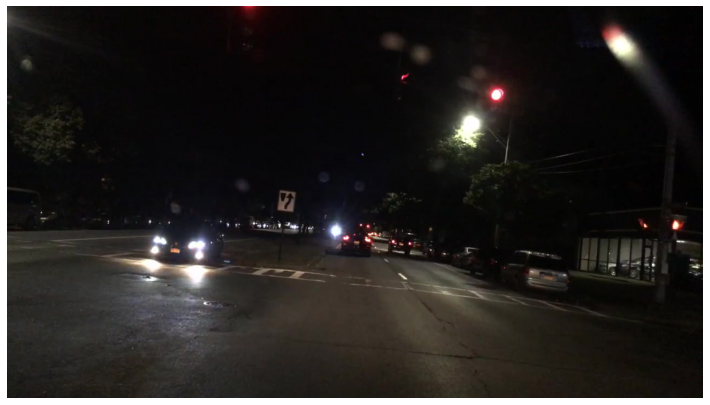


Visualized


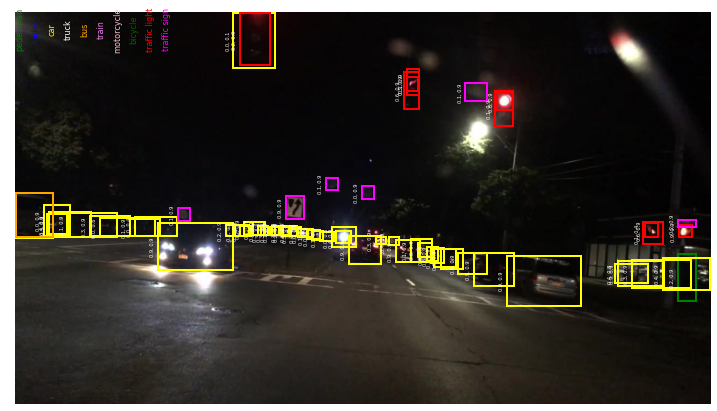

In [34]:
#with open('/storage/slurm/seidensc/datasets/BDD100/bdd100k-models/det/dets.json', 'r') as f:
#    dets = json.load(f)
    
dets = {"b23c9e00-b425de1b/b23c9e00-b425de1b-0000114.jpg": {"bboxes": [[[1218.3404541015625, 443.3758239746094, 1252.5826416015625, 530.4839477539062, 0.26524800062179565]], [], [[262.95196533203125, 387.7740173339844, 401.245849609375, 473.4568176269531, 0.9985437393188477], [904.9654541015625, 447.4041442871094, 1040.3763427734375, 538.7042236328125, 0.9984756112098694], [613.088623046875, 410.1667175292969, 672.895751953125, 461.9017639160156, 0.9978801012039185], [699.7363891601562, 418.2929382324219, 743.8124389648438, 459.2296447753906, 0.9950540065765381], [815.3272705078125, 442.90216064453125, 867.423828125, 480.43975830078125, 0.9857170581817627], [844.5653076171875, 442.1056213378906, 918.2303466796875, 503.5777282714844, 0.9691344499588013], [0.22391510009765625, 332.0130615234375, 69.127685546875, 414.02288818359375, 0.9492148160934448], [1108.7308349609375, 457.117919921875, 1193.8682861328125, 502.395751953125, 0.9165813326835632], [740.34375, 423.018798828125, 767.4373779296875, 448.92462158203125, 0.8593029379844666], [783.1173095703125, 435.22125244140625, 824.5272216796875, 470.79718017578125, 0.8336833715438843], [504.29522705078125, 395.1346130371094, 526.1806030273438, 410.3387756347656, 0.6879439949989319], [764.0585327148438, 432.9925537109375, 788.6310424804688, 460.88311767578125, 0.6186739206314087], [507.3130187988281, 397.77813720703125, 536.5872802734375, 411.66217041015625, 0.5329272747039795], [520.62646484375, 397.8735046386719, 539.3057861328125, 411.9587707519531, 0.48107966780662537], [590.9374389648438, 400.7666320800781, 618.0379028320312, 424.5426940917969, 0.4518841803073883], [1191.5484619140625, 450.5771179199219, 1277.3675537109375, 510.2989807128906, 0.4348459839820862], [687.7123413085938, 413.1202697753906, 705.8860473632812, 428.1640319824219, 0.43100452423095703], [1104.2366943359375, 462.5010986328125, 1163.8626708984375, 497.55096435546875, 0.4150407314300537], [59.23301696777344, 370.1892395019531, 94.78556823730469, 407.0855407714844, 0.40744924545288086], [771.2176513671875, 433.9326477050781, 810.8988037109375, 467.9350280761719, 0.3988765478134155], [1135.1522216796875, 454.2903747558594, 1242.6766357421875, 506.0298156738281, 0.3921196460723877], [466.1881408691406, 394.8771057128906, 484.7242736816406, 409.7565612792969, 0.3819403648376465], [458.7624206542969, 394.24713134765625, 478.0104675292969, 409.8118896484375, 0.36300942301750183], [137.26087951660156, 373.706298828125, 211.68898010253906, 411.10601806640625, 0.3485144078731537], [62.01365280151367, 367.0460510253906, 139.621337890625, 412.2463684082031, 0.33335167169570923], [486.97406005859375, 394.31781005859375, 505.43182373046875, 409.8336181640625, 0.3288474678993225], [663.7542724609375, 413.130615234375, 681.49462890625, 426.36297607421875, 0.32118138670921326], [452.102294921875, 393.5127868652344, 469.9395751953125, 409.5697326660156, 0.3141315281391144], [421.2094421386719, 384.6814270019531, 456.8283386230469, 409.4017028808594, 0.2523709237575531], [403.72265625, 390.55267333984375, 429.91754150390625, 410.65545654296875, 0.23761172592639923], [387.7250671386719, 389.8682556152344, 412.6100769042969, 410.4811096191406, 0.20130866765975952], [490.3171691894531, 392.5519714355469, 517.620361328125, 410.5780944824219, 0.20005641877651215], [414.3952331542969, 392.0234680175781, 434.0856018066406, 410.2550964355469, 0.18756447732448578], [211.4174346923828, 380.1058044433594, 267.19970703125, 410.1781311035156, 0.18567992746829987], [472.4419250488281, 393.3050842285156, 492.5010681152344, 409.6872863769531, 0.16595762968063354], [446.8442077636719, 392.2047119140625, 464.2174377441406, 409.06378173828125, 0.1596156805753708], [436.7694396972656, 385.91595458984375, 459.1389465332031, 408.91241455078125, 0.1467777043581009], [536.4481201171875, 398.8649597167969, 560.6009521484375, 417.0939025878906, 0.14425884187221527], [96.48635864257812, 368.03253173828125, 187.99874877929688, 411.96966552734375, 0.11524789780378342], [560.1867065429688, 402.7816162109375, 586.4619750976562, 420.2412109375, 0.10275401175022125], [728.3941650390625, 416.24627685546875, 767.5643310546875, 458.3411865234375, 0.10170415043830872], [545.2708129882812, 401.77813720703125, 566.0193481445312, 419.08892822265625, 0.09797901660203934], [156.641357421875, 377.62591552734375, 257.0093078613281, 411.438720703125, 0.08534534275531769], [401.41412353515625, 0.0, 477.08013916015625, 101.64326477050781, 0.08314961940050125], [220.57818603515625, 376.389892578125, 297.6925048828125, 411.0184326171875, 0.057225704193115234], [525.5322875976562, 397.3100891113281, 547.3681030273438, 412.4339294433594, 0.052455563098192215], [582.543212890625, 394.74285888671875, 626.23486328125, 431.64471435546875, 0.05240098014473915], [52.4658203125, 352.91961669921875, 100.75881958007812, 410.96649169921875, 0.05024389922618866], [758.033203125, 431.2494812011719, 777.8067626953125, 456.3227233886719, 0.050120435655117035]], [], [[0.5081787109375, 330.8459167480469, 69.48125457763672, 413.0947570800781, 0.08691559731960297]], [], [], [], [[1220.5289306640625, 390.5865173339844, 1245.0162353515625, 412.6244812011719, 0.9140336513519287], [886.1520385742188, 147.89988708496094, 915.6594848632812, 178.59898376464844, 0.8700487613677979], [1159.2318115234375, 387.6680908203125, 1182.1419677734375, 413.57537841796875, 0.6992002129554749], [715.3236694335938, 110.01626586914062, 743.3930053710938, 177.40280151367188, 0.6358119249343872], [720.9926147460938, 118.94459533691406, 741.5841674804688, 144.8372344970703, 0.34262076020240784], [413.2284851074219, 0.01581573486328125, 468.5322570800781, 96.97660064697266, 0.21608898043632507], [883.1597900390625, 143.70693969726562, 915.8565673828125, 207.66207885742188, 0.15267731249332428], [720.6849365234375, 104.11241149902344, 742.9586181640625, 152.11741638183594, 0.1516757607460022], [1155.5701904296875, 385.4878845214844, 1190.7286376953125, 425.8872985839844, 0.10691677033901215]], [[497.5208435058594, 336.54937744140625, 531.6118774414062, 379.49530029296875, 0.9949489831924438], [1218.642333984375, 381.50909423828125, 1252.608642578125, 395.06024169921875, 0.2506694495677948], [828.2665405273438, 130.2324981689453, 868.2423706054688, 162.65403747558594, 0.17351765930652618], [299.31878662109375, 358.5085144042969, 320.71844482421875, 382.3110656738281, 0.15715070068836212], [571.6771850585938, 303.35772705078125, 594.1129760742188, 325.4000244140625, 0.1516994684934616], [637.4329833984375, 319.44317626953125, 659.1163330078125, 341.8515625, 0.09424546360969543]]], "confs": [[0.9866499304771423], [], [0.9521639347076416, 0.9999039173126221, 0.9610710740089417, 0.9999881982803345, 0.9998700618743896, 0.999935507774353, 0.9999890327453613, 0.9998492002487183, 0.9997910857200623, 0.9999511241912842, 0.9965698719024658, 0.9987267851829529, 0.9278560280799866, 0.974697470664978, 0.9937400817871094, 0.9720132946968079, 0.9956509470939636, 0.801169216632843, 0.9938154220581055, 0.9949630498886108, 0.9716771245002747, 0.9858359098434448, 0.9965204000473022, 0.9933698177337646, 0.979084849357605, 0.9860497117042542, 0.9810943603515625, 0.9882081151008606, 0.9840903878211975, 0.9881888628005981, 0.9960755705833435, 0.9592229723930359, 0.9837586283683777, 0.9878724813461304, 0.9561944603919983, 0.986909806728363, 0.9848760366439819, 0.962030291557312, 0.9231260418891907, 0.9807695150375366, 0.9101402759552002, 0.9677281379699707, 0.6436448097229004, 0.1413756161928177, 0.4281906187534332, 0.976947546005249, 0.5350620150566101, 0.9293183088302612, 0.9824076294898987], [], [0.5443175435066223], [], [], [], [0.9997889399528503, 0.9998657703399658, 0.9991957545280457, 0.9982957243919373, 0.9960634112358093, 0.9991521835327148, 0.9610093235969543, 0.9771314263343811, 0.421056866645813], [0.9999858140945435, 0.9539175629615784, 0.9469088912010193, 0.9722442626953125, 0.9911878108978271, 0.9880924820899963]]}}

classes = ['pedestrian', 'rider', 'car', 'truck', 'bus', 'train', 'motorcycle', 'bicycle', 'traffic light', 'traffic sign']
colors = ['green', 'blue', 'yellow', 'white', 'orange', 'violet', 'pink', 'darkgreen', 'red', 'magenta']

for k, v in dets.items():
    visualize(k, v)
    break

# VISUALIZE TRANSFORMATION


In [17]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T
from torchvision import transforms


In [24]:
plt.rcParams["savefig.bbox"] = 'tight'
orig_img = Image.open('/storage/slurm/seidensc/datasets/Market-1501-v15.09.15/images/00507/0507_1_011421_00.jpg')
orig_img.convert('RGB')
# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
torch.manual_seed(0)

In [25]:
def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()
    plt.axis('off')
    plt.show()
    plt.close()
  

In [26]:

def make_transform_heavy(sz_crop=[256, 128], is_train=True):
    return transforms.Compose([
        transforms.Compose([  # train: horizontal flip and random resized crop
            transforms.RandomResizedCrop(sz_crop),
            transforms.RandomHorizontalFlip(p=0.5),
        ]) if is_train else transforms.Compose([  # test: else center crop
            transforms.Resize(sz_crop)
        ]),
    ])

def make_transform(sz_crop=[256, 128],
                   mean=[0.485, 0.456, 0.406], std=[0.299, 0.224, 0.225],
                   is_train=True):

    return transforms.Compose([
        transforms.Compose([  # train: horizontal flip and random resized crop
            transforms.Resize(sz_crop),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.Pad(10),
            transforms.RandomCrop(sz_crop),
        ]) if is_train else transforms.Compose([  # test: else center crop
            transforms.Resize(sz_crop)
        ]),
    ])

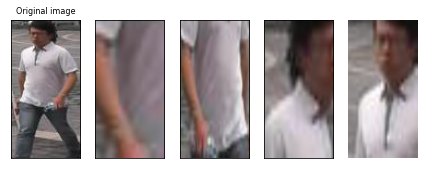

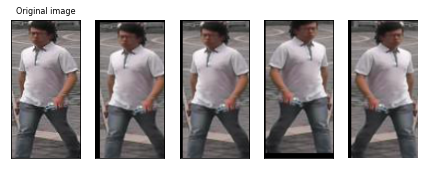

In [29]:
heavy = make_transform_heavy(is_train=True)
norm = make_transform(is_train=True)

heavy_imgs = [heavy(orig_img) for padding in (3, 10, 30, 50)]
norm_imgs = [norm(orig_img) for padding in (3, 10, 30, 50)]

plot(heavy_imgs)
plot(norm_imgs)
